<a href="https://colab.research.google.com/github/ingridcos/exercicios-praticos/blob/main/Semana_18_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r'urban_climate.csv')
print(df.columns)


Index(['city', 'country', 'latitude', 'longitude', 'year', 'month',
       'temperature_celsius', 'humidity_percent', 'precipitation_mm',
       'wind_speed_ms', 'urban_heat_island_intensity', 'data_source'],
      dtype='object')


In [22]:
df_sp = df[df['city'] == 'São Paulo'].copy()
# 3. Limpeza
df_sp = df_sp.drop_duplicates()
# Remover nulos
df_sp = df_sp.dropna()
df_sp['date'] = pd.to_datetime(df_sp[['year', 'month']].assign(DAY=1))
# Ordenar por data
df_sp = df_sp.sort_values('date')
# Exibir as primeiras linhas tratadas
print(df_sp.head())


           city country  latitude  longitude  year  month  \
9384  São Paulo  Brazil  -23.5505   -46.6333  1980      1   
9385  São Paulo  Brazil  -23.5505   -46.6333  1980      2   
9386  São Paulo  Brazil  -23.5505   -46.6333  1980      3   
9387  São Paulo  Brazil  -23.5505   -46.6333  1980      4   
9388  São Paulo  Brazil  -23.5505   -46.6333  1980      5   

      temperature_celsius  humidity_percent  precipitation_mm  wind_speed_ms  \
9384                21.51              32.4              87.4            6.3   
9385                29.82              39.2              56.8            7.1   
9386                31.24              43.2              24.0            9.6   
9387                36.01              21.2              52.1           10.2   
9388                35.67              31.9              39.7           12.6   

      urban_heat_island_intensity            data_source       date  
9384                          1.0  NOAA_Weather_Stations 1980-01-01  
9385        

In [27]:
from google.colab import files

# Salva seu DataFrame tratado (ex: df_sp do seu código)
df_sp.to_csv('sp_temperatura_tratada.csv', index=False)

# BAIXA automático pro PC
files.download('sp_temperatura_tratada.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

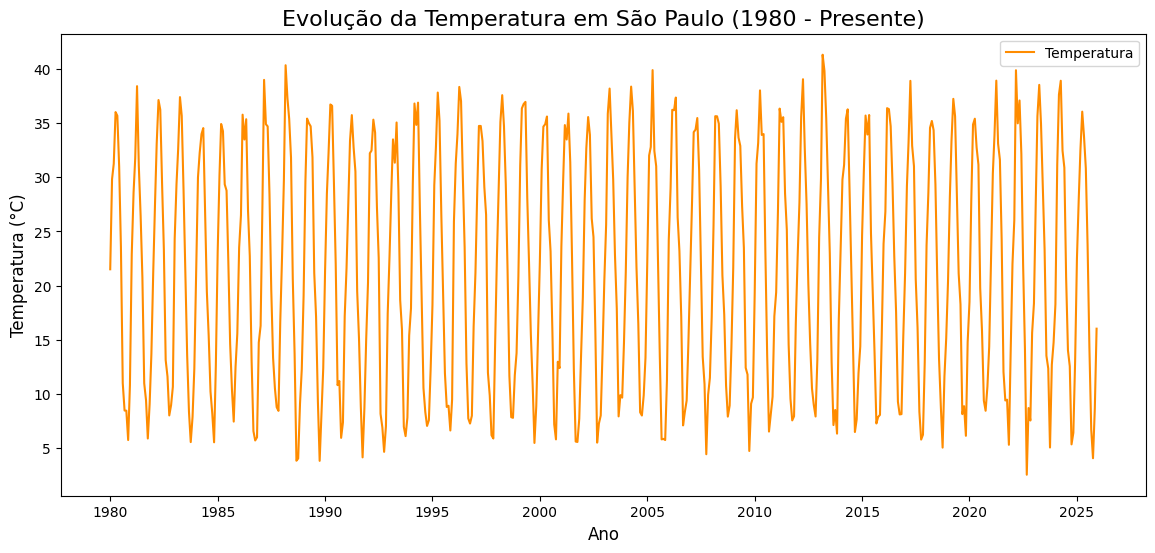

In [23]:
plt.figure(figsize=(14, 6))

# Plotagem da linha
sns.lineplot(data=df_sp, x='date', y='temperature_celsius', color='#FF8C00', label='Temperatura')

# Personalização
plt.title('Evolução da Temperatura em São Paulo (1980 - Presente)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend()
plt.show()

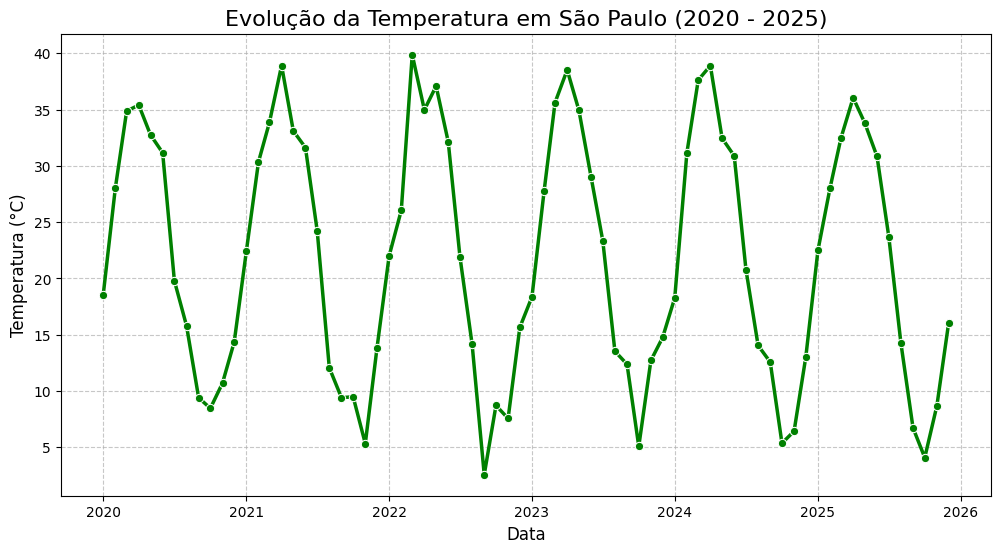

In [24]:
# 1. Filtrar os dados apenas para o intervalo de 2020 a 2025
df_sp_recente = df_sp[(df_sp['year'] >= 2020) & (df_sp['year'] <= 2025)]
plt.figure(figsize=(12, 6))
sns.lineplot(
 data=df_sp_recente,
 x='date',
 y='temperature_celsius',
 marker='o',
 color='green',
 linewidth=2.5
)
plt.title('Evolução da Temperatura em São Paulo (2020 - 2025)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-4027039796.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2025, x='nome_mes', y='temperature_celsius', palette='Oranges')


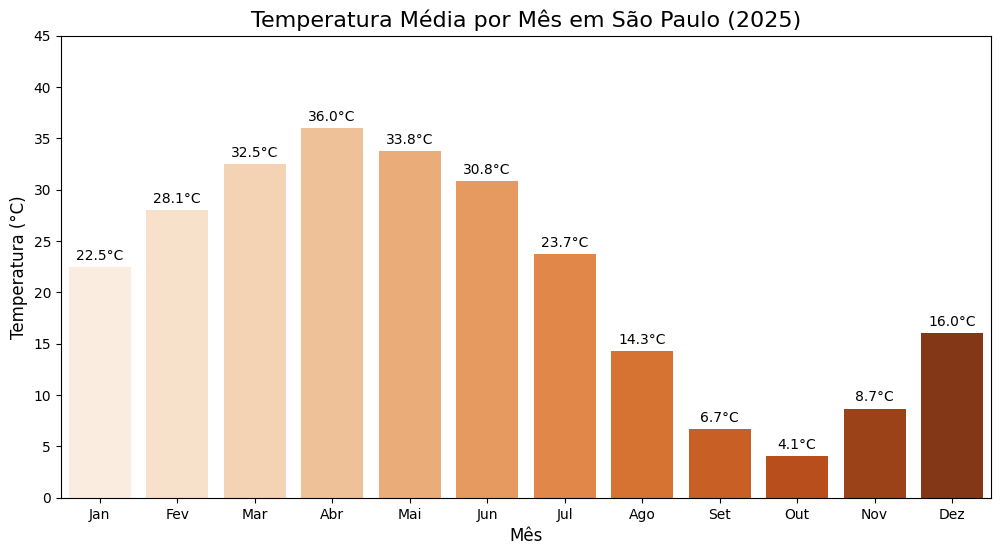

In [25]:
df_2025 = df_sp[df_sp['year'] == 2025].sort_values('month')
mapa_meses = {
 1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
 7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
df_2025['nome_mes'] = df_2025['month'].map(mapa_meses)
# 3. Configurar o gráfico
plt.figure(figsize=(12, 6))
# 4. Plotar Gráfico de Barras
# x = Mês, y = Temperatura
ax = sns.barplot(data=df_2025, x='nome_mes', y='temperature_celsius', palette='Oranges')
# Bônus: Adicionar o valor da temperatura em cima de cada barra
for i in ax.containers:
 ax.bar_label(i, fmt='%.1f°C', padding=3)
# 5. Personalização
plt.title('Temperatura Média por Mês em São Paulo (2025)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.ylim(0, 45) # Ajuste do limite Y para dar espaço aos rótulos
plt.show()

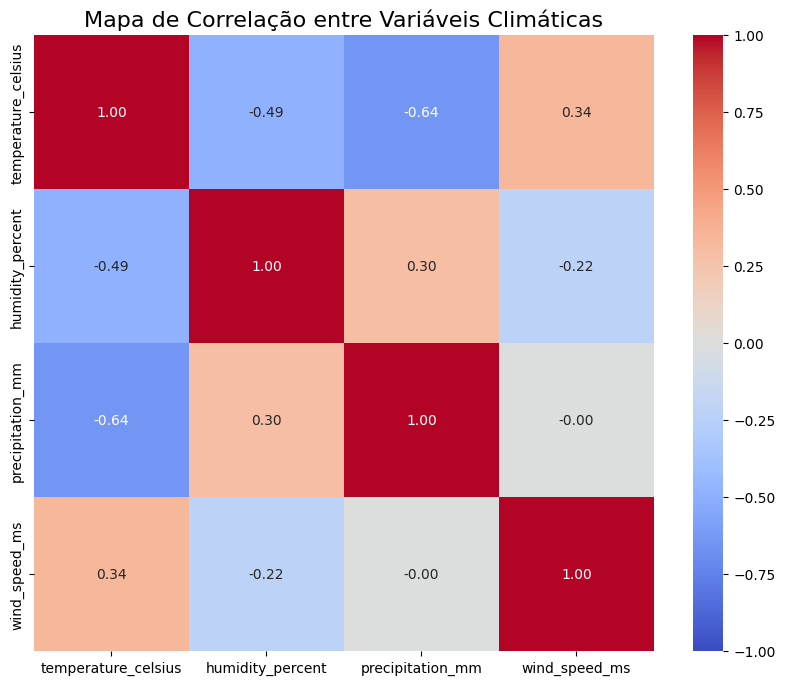

In [20]:
plt.figure(figsize=(10, 8))
colunas = ['temperature_celsius', 'humidity_percent', 'precipitation_mm', 'wind_speed_ms']
matriz_correlacao = df_sp[colunas].corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Correlação entre Variáveis Climáticas', fontsize=16)
plt.show()

In [28]:
import pandas as pd
from google.colab import files

df = pd.read_csv('sp_temperatura_tratada.csv')
df_2015_2025 = df[(df['year'] >= 2015) & (df['year'] <= 2025)]

# Agrupa chuva por ano (total mm)
chuva_anual = df_2015_2025.groupby('year')['precipitation_mm'].sum().reset_index()
chuva_anual.columns = ['Ano', 'Chuva_Total_mm']

chuva_anual.to_csv('chuva_sp_2015_2025.csv', index=False)
files.download('chuva_sp_2015_2025.csv')
print(chuva_anual)  # VE OS DADOS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Ano  Chuva_Total_mm
0   2015           796.3
1   2016           848.6
2   2017           829.5
3   2018           989.2
4   2019          1024.6
5   2020           851.3
6   2021           974.2
7   2022           957.2
8   2023           911.5
9   2024          1004.4
10  2025           809.6
